In [1]:
import os
import math
import random
import numpy as np
import random

import torch

import models
from models import DeepLab

import draw, utils

In [2]:
Train_filename = "samples_train.npy"
Valid_filename = "samples_valid.npy"
Modelname =  "largescale"

In [3]:
num_sample = 1000
root_path = os.path.abspath(".")
dataset_name = 'Models'
dataset_path = os.path.join(root_path, "datasets", dataset_name)
# print(dataset_path)
train_dataset_path = os.path.join(dataset_path, "Training_dataset")
# print(train_dataset_path)
sample_name_list = []
for i in range(num_sample):
    train_sample_file = f'{i}'
    sample_name_list.append(train_sample_file)

train_set_ratio = 0.7999
num_data_sample = len(sample_name_list)
print(num_data_sample)

random.shuffle(sample_name_list)

valid_num = int(num_data_sample * (1-train_set_ratio))
valid_list = random.sample(sample_name_list, valid_num)

samples_train,samples_valid = [],[]
for sample_name in sample_name_list[:num_sample]:
    if sample_name not in valid_list:
        samples_train.append(sample_name)
    else:
        samples_valid.append(sample_name)

print(f'The number of training samples：{len(samples_train)}')
print(f'The number of validation samples：{len(samples_valid)}')

np.save(os.path.join(dataset_path,Train_filename), samples_train)
np.save(os.path.join(dataset_path,Valid_filename), samples_valid)

In [4]:
os.environ['CUDA_VISIBLE_DEVICES']= '0'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if torch.cuda.is_available():
    num_GPU = torch.cuda.device_count()
    print(f"GPU number: {num_GPU}")
print(f"operation platform: {device}")
    
root_path = os.path.abspath('.')

In [5]:
dataset_name = "Models"
dataset_path = os.path.join(root_path, "datasets", dataset_name)
                            
samples_train = np.load(os.path.join(dataset_path, Train_filename), allow_pickle=True)
samples_valid = np.load(os.path.join(dataset_path, Valid_filename), allow_pickle=True)

print(f'The number of training samples：{len(samples_train)}')
print(f'The number of validation samples：{len(samples_valid)}')

train_sample_path = os.path.join(dataset_path, "Training_dataset")
input_attr_list, output_attr_list, mask_attr_list = ["spns"], ["label"],["mask"]
filter4_attr_list, filter16_attr_list = ["filter4"],["filter16"]

In [6]:
# plot
train_data =  utils.build_dataset(samples_train, train_sample_path, 'Train',
                                  input_attr_list=input_attr_list, 
                                  output_attr_list=output_attr_list,
                                  mask_attr_list = mask_attr_list,
                                  filter4_attr_list = filter4_attr_list,
                                  filter16_attr_list = filter16_attr_list)
valid_data =  utils.build_dataset(samples_valid, train_sample_path, 'Valid',
                                  input_attr_list=input_attr_list, 
                                  output_attr_list=output_attr_list,
                                  mask_attr_list = mask_attr_list,
                                  filter4_attr_list = filter4_attr_list,
                                  filter16_attr_list = filter16_attr_list)

idxs = np.random.randint(0, len(train_data), size=4) 
batch_samples = [train_data[i] for i in idxs]
draw_attr_list = input_attr_list + output_attr_list
draw.draw_samples(batch_samples, draw_attr_list,cmap=["gray","jet"])

In [7]:
train_data =  utils.build_dataset(samples_train, train_sample_path, 'Train',
                                  input_attr_list=input_attr_list, 
                                  output_attr_list=output_attr_list,
                                  mask_attr_list = mask_attr_list,
                                  filter4_attr_list = filter4_attr_list,
                                  filter16_attr_list = filter16_attr_list)
valid_data =  utils.build_dataset(samples_valid, train_sample_path, 'Valid',
                                  input_attr_list=input_attr_list, 
                                  output_attr_list=output_attr_list,
                                  mask_attr_list = mask_attr_list,
                                  filter4_attr_list = filter4_attr_list,
                                  filter16_attr_list = filter16_attr_list)

In [7]:
# define the network
param_model = {}
param_model['backbone'] = "DeepLab"
param_model['input_channels'] = 1
param_model['output_channels'] = 2

dataset_name = Modelname
session_name = '-'.join([param_model['backbone'], dataset_name])
# # model = UNet(param_model)
# model = DeepLab(param_model)
model = getattr(models, param_model['backbone'])(param_model)

if torch.cuda.is_available():
    model = torch.nn.DataParallel(model, device_ids=range(num_GPU)).to(device)
else:
    model = model.to(device) 
    
# model save file    
checkpoint_path = os.path.join('checkpoints', session_name)
if not os.path.exists(checkpoint_path):
    os.makedirs(checkpoint_path)
print(f"model save file: {checkpoint_path}")


In [9]:
param = {}
param['epochs'] = 201     
param['batch_size'] = 16  
param['lr'] = 1e-2          
# SGD
param['gamma'] = 0.9      
param['step_size'] = 50  
param['momentum'] = 0.8    
# Adam
param['lr_factor'] = 0.5 
param['lr_patience'] = 2 
param['weight_decay'] = 1e-4 

param['optimizer_type'] = 'Adam' 
param['checkpoint_path'] = checkpoint_path
param['disp_inter'] = 1 
param['save_inter'] = 5 
param['rgt_fault_epoch'] = 100 

Epoch:0, Training Loss:0.50835248  Validation Loss:0.72741383  Learning rate: 0.01000000
Epoch:1, Training Loss:0.21378268  Validation Loss:0.58178791  Learning rate: 0.01000000
Epoch:2, Training Loss:0.16798448  Validation Loss:0.24495950  Learning rate: 0.01000000
Epoch:3, Training Loss:0.16118366  Validation Loss:0.19492588  Learning rate: 0.01000000
Epoch:4, Training Loss:0.13326599  Validation Loss:0.21949298  Learning rate: 0.01000000
Epoch:5, Training Loss:0.11823564  Validation Loss:0.14825495  Learning rate: 0.01000000
Epoch:6, Training Loss:0.11379387  Validation Loss:0.13076690  Learning rate: 0.01000000
Epoch:7, Training Loss:0.10808647  Validation Loss:0.11659269  Learning rate: 0.01000000
Epoch:8, Training Loss:0.11917214  Validation Loss:0.34613937  Learning rate: 0.01000000
Epoch:9, Training Loss:0.09814693  Validation Loss:0.19716028  Learning rate: 0.01000000
Epoch:10, Training Loss:0.09273350  Validation Loss:0.14828845  Learning rate: 0.01000000
Epoch:11, Training L

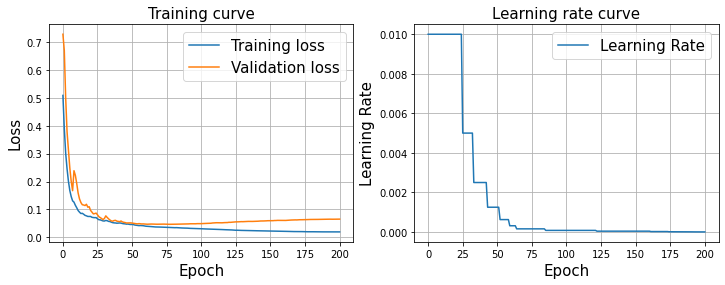

In [10]:
model = utils.train_valid_netDeepLab(param, model, train_data, valid_data, input_attrs=input_attr_list, 
                              output_attrs=output_attr_list, filter4_attrs=filter4_attr_list, 
                              filter16_attrs=filter16_attr_list,plot=True)

In [11]:
quit()